# Business Understanding

Justin Lee

This notebook is prepared for SyriaTel, a leading mobile telecommunications company in Syria since 2000. The company aims to minimize revenue losses caused by customers who discontinue their services prematurely. This analysis seeks to identify and understand patterns that may predict customer churn.

# Data Understanding

This dataset is from SyriaTel and tells the churn rate of customers across. This dataset contains 20 predictor variables mostly about customer usage patterns. There are 3333 records in this dataset, out of which 483 customers are churners and the remaining 2850 are non-churners. The ratio of churners in this dataset is 14%.

An important initial limitation to note here is the class imbalance of churn/non-churners.

In [1]:
import pandas as pd

# Read in CSV file
df = pd.read_csv("SyriaTel_Customer_Churn.csv", index_col=0)

In [2]:
# Preview first few rows of our dataframe
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Generate summary statistics of numerical columns of our dataframe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
# View the data types of the columns
print(df.dtypes)

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [5]:
# Check for class imbalance
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [6]:
# Check for missing/invalid values
df.isnull().sum()

account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
# Transform categorical variables, calculate correlations, and identify most important variables related to churn
df = pd.get_dummies(df, columns=['international plan', 'voice mail plan'], drop_first=True)
df['churn'] = df['churn'].astype(int)
correlations = df.corr()
churn_correlations = correlations['churn'].sort_values(ascending=False)
print(churn_correlations)

churn                     1.000000
international plan_yes    0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan_yes      -0.102148
Name: churn, dtype: float64


The top three highest correlation to churn are international plans, customer service calls, and total day minutes.

I'll be preparing my data to create a model that would predict if these three categories 

# Data Preparation

In order to prepare our data for analysis, we must first import the train_test_split class to evaluate our model on unseen data. We will declare churn as our target variable and split the data into 70% training and 30% for testing. We will then ensure the numeric columns exclude our churn column to avoid data leakage, create a clear and unbiased correlation analysis, and to create more accurate modeling and evaluation.

In [8]:
# Import train_test_split to evaluate my model on unseen data
from sklearn.model_selection import train_test_split

# Our target variable is churn
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Linear models & logistic regression require scaling
from sklearn.preprocessing import StandardScaler

# Ensure 'numeric_columns' excludes 'churn'
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Scale only numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# Modeling & Evaluation

For our first model we will begin with logistic regression because it is simple, interpretable, efficient, and provides a reference point for model comparison. It sets the foundation for exploring more advanced models if additional complexity is justified by improved performance.

To address the class imbalance noted earlier, we will use SMOTE (synthetic minority over-sampling technique). SMOTE is used in our iterated model to handle class imbalance, which improves the model's ability to detect the minority class (churn) and results in a more balanced and effective classifier.

Both models will have an evaluation on the classification report, confusion matrix, ROC-AUC score, and a visualization of the ROC curve. The classification report shows us the precision, recall and F1-score for overall evaluation. The confusion matrix shows us the detailed error breakdown. The ROC-AUC score measures our classification power. The ROC curve is a visual representation of performance across thresholds.

### Baseline Model - Logistic Regression

Now that we have our data in a train test split we will start training a logistic regression baseline model.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train the model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       857
           1       0.58      0.08      0.14       143

    accuracy                           0.86      1000
   macro avg       0.72      0.53      0.53      1000
weighted avg       0.82      0.86      0.81      1000

Confusion Matrix:
 [[849   8]
 [132  11]]
ROC-AUC Score: 0.7826863917879088


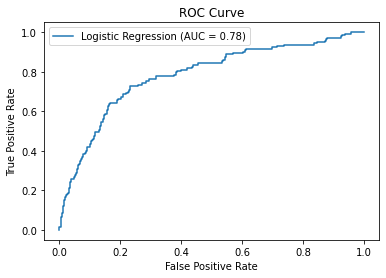

In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_prob)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Baseline Model Evaluation

Our baseline model predicted an **accuracy score of 86%** of the total samples but this may be misleading due to imbalanced datasets. This score may be favoring the majority class because we saw that we have 857 samples for non-churn cases and only 143 samples for churn cases.

**Non-churn cases**:
A precision score of 87% means that out of all predictions made for non-churn, 87% were correct.
A recall score of 99% means that our model correctly identified 99% of actual non-churn cases.
An F1-score of 0.92 indicates excellent balance between precision and recall for the majority class.

**Churn cases**:
A precision score of 58% means that out of all predictions made for churn, only 58% were correct.
A recall score of 8% means that our model correctly identified only 8% of actual churn cases.
An F1-score of 0.14 indicates a poor performance for the minority class as both precision and recall are low.

The **confusion matrix** provides additional insight:
True Negatives (849): The model correctly predicted 849 non-churn instances.
False Positives (8): Only 8 non-churn instances were incorrectly predicted as churn.
False Negatives (132): A large number of churn cases were misclassified as non-churn.
True Positives (11): Only 11 churn cases were correctly predicted.
This highlights the model's strong bias toward the majority class.

**ROC-AUC Score: 0.78**
This indicates the model has a decent ability to rank positive samples higher than negative ones in terms of predicted probabilities. However, the low recall for churn cases suggests that the threshold for predicting churn may need adjustment.

We will now iterate our model to oversample the minority class, thus reducing the class imbalance observed in our baseline model.

### Iterated Model - Address Class Imbalance

We will oversample the minority class in the training data using SMOTE.

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Original training class distribution:\n{y_train.value_counts()}")
print(f"Resampled training class distribution:\n{pd.Series(y_train_resampled).value_counts()}")

Original training class distribution:
0    1993
1     340
Name: churn, dtype: int64
Resampled training class distribution:
1    1993
0    1993
Name: churn, dtype: int64


Train a Logistic Regression on the resampled data.

In [13]:
# Train Logistic Regression on resampled data
logreg_smote = LogisticRegression(random_state=42, max_iter=1000)
logreg_smote.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
# Predict on the test set
y_pred_smote = logreg_smote.predict(X_test_scaled)
y_pred_prob_smote = logreg_smote.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("Classification Report (SMOTE):\n", classification_report(y_test, y_pred_smote))

# Confusion Matrix
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_smote))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob_smote)
print("ROC-AUC Score (SMOTE):", roc_auc)

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.94      0.69      0.80       857
           1       0.29      0.76      0.42       143

    accuracy                           0.70      1000
   macro avg       0.62      0.72      0.61      1000
weighted avg       0.85      0.70      0.75      1000

Confusion Matrix (SMOTE):
 [[595 262]
 [ 35 108]]
ROC-AUC Score (SMOTE): 0.7784351004887762


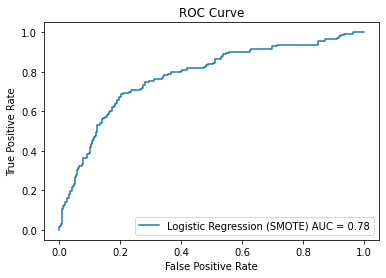

In [15]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_smote)
plt.plot(fpr, tpr, label="Logistic Regression (SMOTE) AUC = {:.2f}".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Iterated Model Evaluation

Our new model's **accuracy is 70%**. The overall accuracy decreased from the baseline model's 86%, but this is expected because the model is now focusing more on the minority class (churn). Accuracy is less important in this case, as we prioritize recall for churn.

**Non-churn cases**: A precision score of 94% means that out of all predictions made for non-churn, 94% were correct. A recall score of 69% means that our model correctly identified 69% of actual non-churn cases. An F1-score of 0.8 indicates that despite a drop in recall the model still performs well for the majority class.

**Churn cases**: A precision score of 29% means that out of all predictions made for churn, 29% were correct. This indicates a high false positive rate. A recall score of 76% tells us that the model correctly identified 76% of actual churn cases, a significant improvement over the baseline model's 8% recall. An F1-score of 0.42 shows an improvement over the baseline model's F1-score of 0.14 for churn cases. This indicates better balance between precision and recall.

The **confusion matrix** provides more insights. True Negatives (595): The model correctly identified 595 non-churn cases. False Positives (262): The model incorrectly predicted 262 non-churn cases as churn, contributing to the drop in precision for non-churn cases. False Negatives (35): The model missed only 35 churn cases, a significant improvement over the baseline (132 false negatives). True Positives (108): The model correctly identified 108 churn cases, up from just 11 in the baseline model. This reflects a clear improvement in identifying churn cases, which aligns with the primary business objective.

**ROC-AUC Score: 0.778** This is comparable to the baseline (0.782), showing that the model's overall ability to distinguish between churn and non-churn remains strong despite the adjustments for class imbalance.

# Conclusion

Our baseline model had high accuracy of 86% but extremely poor recall of 8% for the minority class (churn). There was a strong bias toward the majority class (non-churn), leading to most churn cases being misclassified. Indicators of churn (international plans, customer service calls, total day minutes) were not effectively captured in predictions.

Addressing class imbalance with SMOTE significantly improved recall for churn (from 8% to 76%), aligning better with the business goal of identifying churn cases. However, the precision for churn dropped to 29%, meaning many non-churn cases were misclassified as churn (false positives). The ROC-AUC remained consistent across models (~0.78), suggesting that the overall separability of classes was maintained.

From the logistic regression coefficients and feature analysis there are some factors that can predict higher churn probabilities. Customers with international plans are more likely to churn. This could indiciate dissatisfaction with plan costs or perceived lack of value. A high number of customer service calls correlate with churn, likely reflecting customer dissatisfaction or unresolved issues. Additionally, customers with higher call usage (total day minutes) are more likely to churn. This could be due to higher bills or dissatisfaction with pricing.  

This analysis highlights that churn is influenced by clear patterns, such as having an international plan or high customer service interactions. While the SMOTE-enhanced model improved recall for churn cases, further iterations (e.g., advanced models, threshold optimization) are needed to enhance precision and overall effectiveness. Combining these insights with retention strategies can significantly reduce churn rates and improve customer satisfaction.

# Limitations

The dataset's inherent imbalance (857 non-churn vs. 143 churn) limits the model's ability to learn patterns for churn without intervention like SMOTE or class weighting.

The iterated model prioritized recall for churn at the expense of precision, leading to high false positives. This could result in inefficient resource allocation for retention campaigns.

The models assumed linear relationships between features and churn. Non-linear models might capture more complex patterns.

Features like tenure, customer lifetime value, or qualitative feedback were not included in the dataset and could provide additional predictive power.

Logistic Regression uses a fixed decision threshold (default = 0.5). This threshold may not align with the business priority of minimizing false negatives (missed churn cases).

# Next Steps

For next steps, I'd be interested testing on more advanced models like Random Forest or Gradient Boosting, which handle imbalanced datasets better and can capture non-linear relationships.

I'd also be interested in adjusting the decision threshold. We could lower the classification threshold to 0.3-0.4 to achieve a better precision-recall balance for churn cases.

To improve data collection we could include features like tenure, average monthly charges, customer satisfaction ratings, or billing disputes to better capture factors driving churn.

Lastly, we could deploy the model in a live environment to predict churn and measure the effectiveness of interventions.